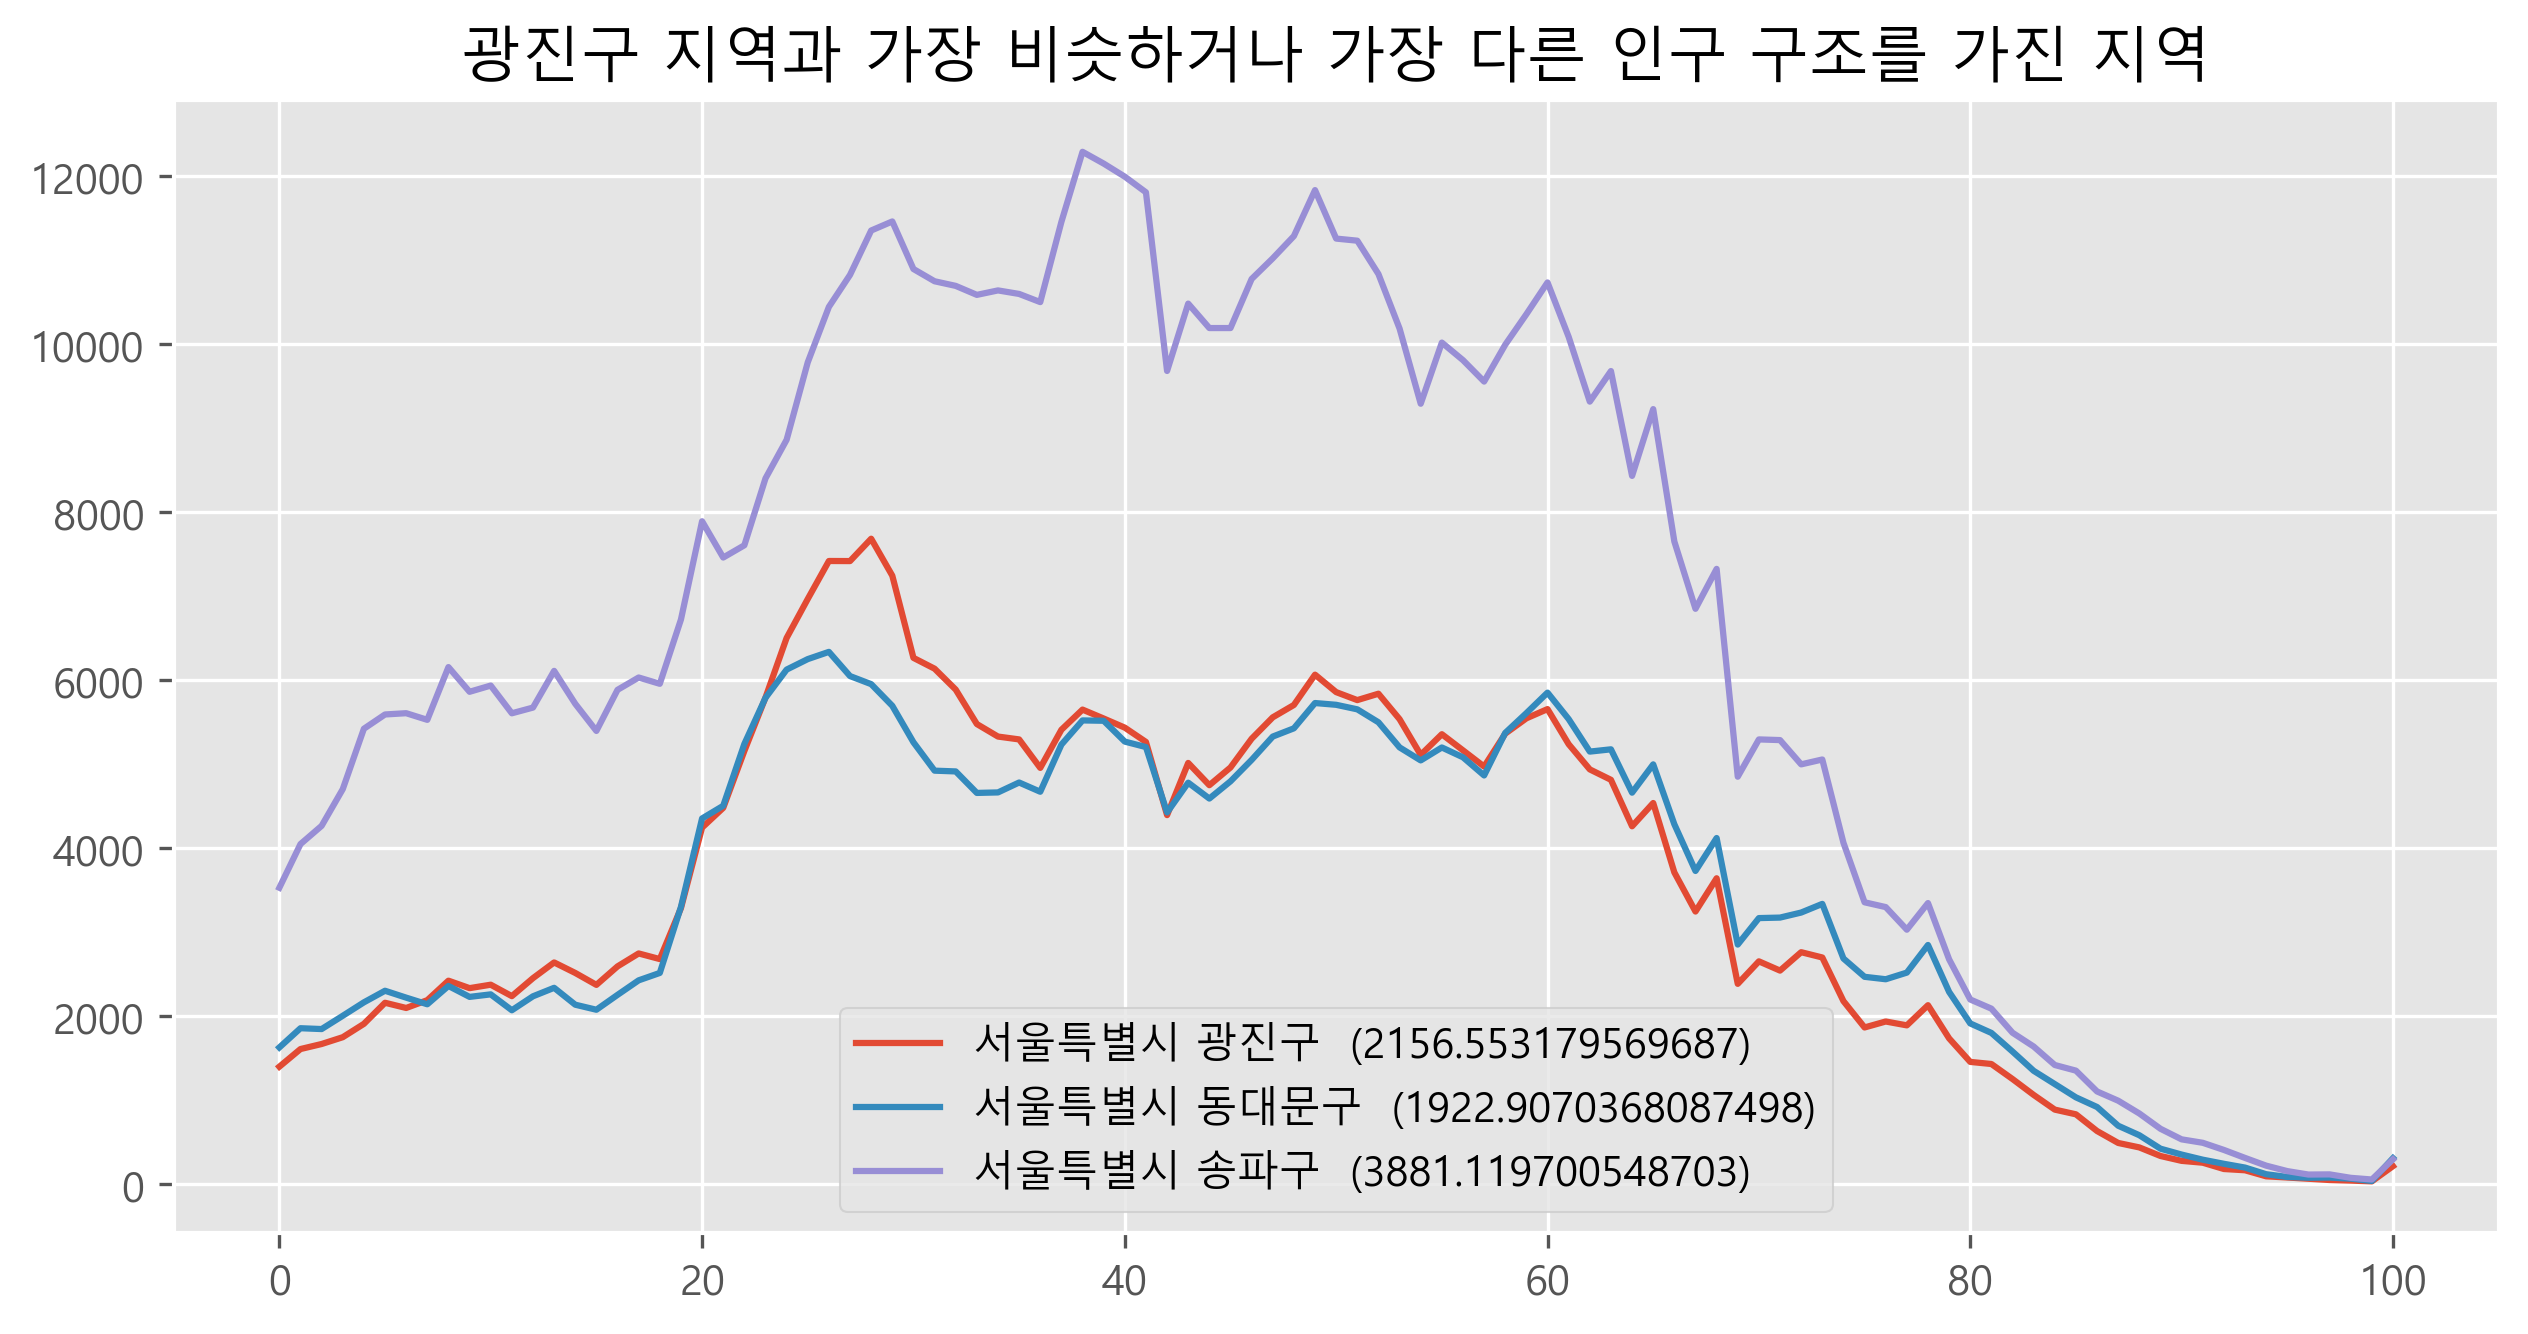

In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

f = open('seoulPopulation.csv')
data = csv.reader(f)
next(data)
next(data)
data = list(data)

gwangjin = []
gName = ''

differ = []
other = []
total = 0

min = math.pow(10,11)
minName = ''
minList = []

max = 0
maxName = ''
maxList = []

for row in data:
    if '광진구' in row[1]:
        for i in range(101):
            row[i+4] = int(row[i+4].replace(',',''))
            gwangjin.append(row[i+4])
        gName = row[1]

for row in data:
    total = 0
    other = []
    differ = []
    for i in range(101):
        if(type(row[i+4])==str):
            row[i+4] = int(row[i+4].replace(',',''))
        else:
            row[i+4] = int(row[i+4])
        differ.append(math.pow(gwangjin[i]-row[i+4],2))
        other.append(row[i+4])
        
    total = np.sum(differ)

    if (total<min) and (total>0):
        min = total
        minName = row[1]
        minList = other
    if total > max:
        max = total
        maxName = row[1]
        maxList = other
        
gwangjin = np.array(gwangjin)
minList = np.array(minList)
maxList = np.array(maxList)

gName += ' (' + str(np.std(gwangjin)) + ')'
minName += ' (' + str(np.std(minList)) + ')'
maxName += ' (' + str(np.std(maxList)) + ')'

plt.style.use('ggplot')
plt.figure(figsize=(10,5),dpi=300)
plt.rc('font', family = 'Malgun Gothic')
plt.title('광진구 지역과 가장 비슷하거나 가장 다른 인구 구조를 가진 지역')
plt.plot(gwangjin, label = gName)
plt.plot(minList, label = minName)
plt.plot(maxList, label = maxName)
plt.legend()
plt.show()